In [60]:
import pandas as pd
import numpy as n
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_excel('C:\\Users\\saira\\OneDrive\\Desktop\\DigitalEye\\dg.xlsx')
columns_to_drop = ['Name']
data.drop(columns=columns_to_drop, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Age                                     300 non-null    int64
 1   Sex                                     300 non-null    int64
 2   wearables                               300 non-null    int64
 3   Duration                                300 non-null    int64
 4   onlineplatforms                         300 non-null    int64
 5   Nature                                  300 non-null    int64
 6   screenillumination                      300 non-null    int64
 7   workingyears                            300 non-null    int64
 8   hoursspentdailycurricular               300 non-null    int64
 9   hoursspentdailynoncurricular            300 non-null    int64
 10  Gadgetsused                             300 non-null    int64
 11  levelofgadjetwithre

In [61]:
def categorize_value(value):
    if value > 15:
        return "Normal"
    elif value >= 10:
        return "Mild"
    elif value >= 5:
        return "Moderate"
    else:
        return "Severe"

# Apply the function to each column and create new columns
data['Schimers1Lefteye_category'] = data['Schimers1Lefteye'].apply(categorize_value)
data['Schimers1righteye_category'] = data['Schimers1righteye'].apply(categorize_value)
data['Schimers2Lefteye_category'] = data['Schimers2Lefteye'].apply(categorize_value)
data['Schimers2righteye_category'] = data['Schimers2righteye'].apply(categorize_value)
# Assuming your dataset is stored in a DataFrame named 'data'

# Print unique values in each category column
print("Unique values in Schimers1Lefteye_category:", data['Schimers1Lefteye_category'].unique())
print("Unique values in Schimers1righteye_category:", data['Schimers1righteye_category'].unique())
print("Unique values in Schimers2Lefteye_category:", data['Schimers2Lefteye_category'].unique())
print("Unique values in Schimers2righteye_category:", data['Schimers2righteye_category'].unique())

Unique values in Schimers1Lefteye_category: ['Mild' 'Normal' 'Moderate' 'Severe']
Unique values in Schimers1righteye_category: ['Mild' 'Normal' 'Moderate' 'Severe']
Unique values in Schimers2Lefteye_category: ['Normal' 'Moderate' 'Mild']
Unique values in Schimers2righteye_category: ['Mild' 'Normal' 'Moderate']


In [62]:
# Count occurrences of "severe" in 'Schimers1Lefteye_category' column
severe_count_left = data['Schimers1Lefteye_category'].value_counts().get('Severe', 0)

# Count occurrences of "severe" in 'Schimers1righteye_category' column
severe_count_right = data['Schimers1righteye_category'].value_counts().get('Severe', 0)

print("Occurrences of 'severe' in Schimers1Lefteye_category column:", severe_count_left)
print("Occurrences of 'severe' in Schimers1righteye_category column:", severe_count_right)


Occurrences of 'severe' in Schimers1Lefteye_category column: 3
Occurrences of 'severe' in Schimers1righteye_category column: 4


In [63]:
# Count occurrences of "severe" in 'Schimers1Lefteye_category' column
severe_count_left = data['Schimers1Lefteye_category'].value_counts().get('Severe', 0)

# Count occurrences of "severe" in 'Schimers1righteye_category' column
severe_count_right = data['Schimers1righteye_category'].value_counts().get('Severe', 0)

print("Occurrences of 'severe' in Schimers1Lefteye_category column:", severe_count_left)
print("Occurrences of 'severe' in Schimers1righteye_category column:", severe_count_right)


Occurrences of 'severe' in Schimers1Lefteye_category column: 3
Occurrences of 'severe' in Schimers1righteye_category column: 4


In [64]:
columns_to_drop = ['Schimers1Lefteye','Schimers2Lefteye','Schimers1righteye','Schimers2righteye']
data.drop(columns=columns_to_drop, inplace=True)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Age                                     300 non-null    int64 
 1   Sex                                     300 non-null    int64 
 2   wearables                               300 non-null    int64 
 3   Duration                                300 non-null    int64 
 4   onlineplatforms                         300 non-null    int64 
 5   Nature                                  300 non-null    int64 
 6   screenillumination                      300 non-null    int64 
 7   workingyears                            300 non-null    int64 
 8   hoursspentdailycurricular               300 non-null    int64 
 9   hoursspentdailynoncurricular            300 non-null    int64 
 10  Gadgetsused                             300 non-null    int64 
 11  levelo

Feature Importances:
                              Importance
Severityofcomplaints            0.259276
Age                             0.129858
freqquencyofcomplaints          0.121995
Ocularsymptomsobservedlately    0.111206
hoursspentdailycurricular       0.080920
hoursspentdailynoncurricular    0.076834
Avgnighttimeusageperday         0.075593
wearables                       0.074772
Complaintsfrequency             0.069547


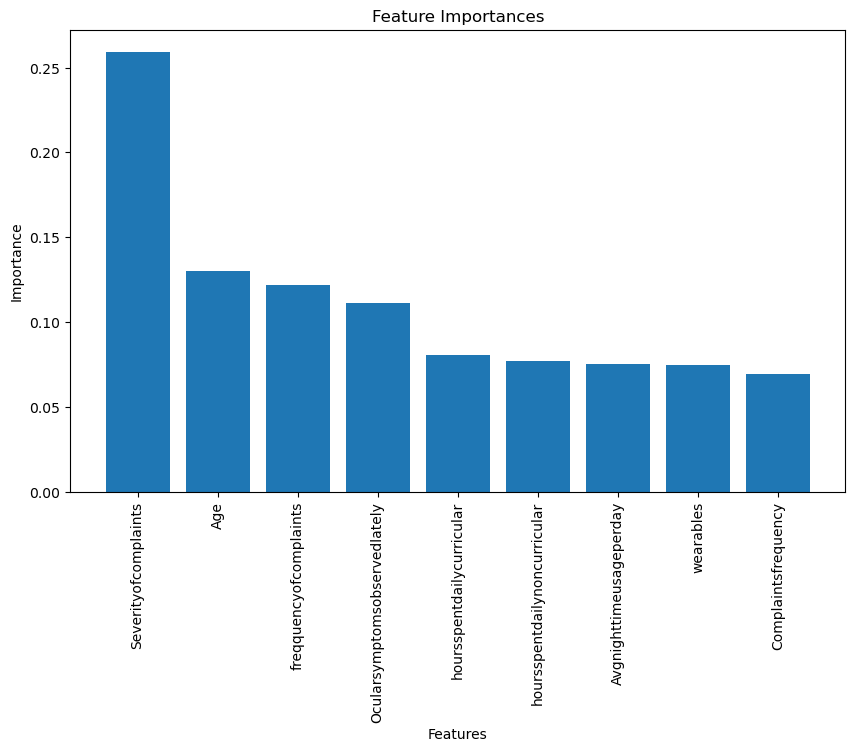

In [66]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
# Assuming 'X_train' contains your training features and 'y_train' contains your target variable
# Initialize a Random Forest classifier
clf = RandomForestClassifier()

# Train the model
clf.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['Importance'])

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Separate features and target variables
X = data.drop(['Schimers1Lefteye_category', 'Schimers1righteye_category', 'Schimers2Lefteye_category', 
               'Schimers2righteye_category','levelofgadjetwithrespecttoeyes','Blinkingduringscreenusage','Sex','Nature'
              ,'Gadgetsused','onlineplatforms','Duration','Distancekeptbetweeneyesandgadjet','workingyears'
               ,'Difficultyinfocusingafterusingscreens','screenillumination','frequencyofdryeyes','Symptomsobservingatleasthalfofthetimes'], axis=1)
y = data[['Schimers1Lefteye_category', 'Schimers1righteye_category', 'Schimers2Lefteye_category', 'Schimers2righteye_category']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train separate models for each target variable
clf_1 = DecisionTreeClassifier()
clf_2 = DecisionTreeClassifier()
clf_3 = DecisionTreeClassifier()
clf_4 = DecisionTreeClassifier()

# Train each model on the training data
clf_1.fit(X_train, y_train['Schimers1Lefteye_category'])
clf_2.fit(X_train, y_train['Schimers1righteye_category'])
clf_3.fit(X_train, y_train['Schimers2Lefteye_category'])
clf_4.fit(X_train, y_train['Schimers2righteye_category'])

# Predicting for each target variable
y_pred_1 = clf_1.predict(X_test)
y_pred_2 = clf_2.predict(X_test)
y_pred_3 = clf_3.predict(X_test)
y_pred_4 = clf_4.predict(X_test)

# Calculate accuracy for each target variable
accuracy_1 = accuracy_score(y_test['Schimers1Lefteye_category'], y_pred_1)
accuracy_2 = accuracy_score(y_test['Schimers1righteye_category'], y_pred_2)
accuracy_3 = accuracy_score(y_test['Schimers2Lefteye_category'], y_pred_3)
accuracy_4 = accuracy_score(y_test['Schimers2righteye_category'], y_pred_4)

print("Accuracy for Schimers1Lefteye_category:", accuracy_1)
print("Accuracy for Schimers1righteye_category:", accuracy_2)
print("Accuracy for Schimers2Lefteye_category:", accuracy_3)
print("Accuracy for Schimers2righteye_category:", accuracy_4)

# Generate classification report for each target variable
report_1 = classification_report(y_test['Schimers1Lefteye_category'], y_pred_1)
print("Classification Report for Schimers1Lefteye_category:\n", report_1)

report_2 = classification_report(y_test['Schimers1righteye_category'], y_pred_2)
print("Classification Report for Schimers1righteye_category:\n", report_2)

report_3 = classification_report(y_test['Schimers2Lefteye_category'], y_pred_3)
print("Classification Report for Schimers2Lefteye_category:\n", report_3)

report_4 = classification_report(y_test['Schimers2righteye_category'], y_pred_4)
print("Classification Report for Schimers2righteye_category:\n", report_4)


Accuracy for Schimers1Lefteye_category: 0.6333333333333333
Accuracy for Schimers1righteye_category: 0.65
Accuracy for Schimers2Lefteye_category: 0.8
Accuracy for Schimers2righteye_category: 0.9166666666666666
Classification Report for Schimers1Lefteye_category:
               precision    recall  f1-score   support

        Mild       0.27      0.29      0.28        14
    Moderate       0.17      0.50      0.25         2
      Normal       0.85      0.75      0.80        44

    accuracy                           0.63        60
   macro avg       0.43      0.51      0.44        60
weighted avg       0.69      0.63      0.66        60

Classification Report for Schimers1righteye_category:
               precision    recall  f1-score   support

        Mild       0.35      0.58      0.44        12
    Moderate       0.00      0.00      0.00         0
      Normal       0.91      0.68      0.78        47
      Severe       0.00      0.00      0.00         1

    accuracy                 

C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Drop unnecessary columns
X = data.drop(['Schimers1Lefteye_category', 'Schimers1righteye_category', 'Schimers2Lefteye_category', 
               'Schimers2righteye_category','onlineplatforms','Sex','Distancekeptbetweeneyesandgadjet','levelofgadjetwithrespecttoeyes','Blinkingduringscreenusage','Difficultyinfocusingafterusingscreens','workingyears','Duration','Gadgetsused','screenillumination','hoursspentdailynoncurricular','Nature'], axis=1)
# X = df[['Severityofcomplaints','freqquencyofcomplaints','Age','Ocularsymptomsobservedlately','hoursspentdailynoncurricular','Complaintsfrequency']]
y1 = data['Schimers1Lefteye_category'] 
y2 = data['Schimers1righteye_category'] 
y3 = data['Schimers2Lefteye_category'] 
y4 = data['Schimers2righteye_category'] 
# Encode categorical variables if needed
# For example, if any other columns contain non-numeric data
# encoder = LabelEncoder()
# data['SomeColumn'] = encoder.fit_transform(data['SomeColumn'])



# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2= train_test_split(X, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4, test_size=0.2, random_state=42)


# Initialize decision tree classifier
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = DecisionTreeClassifier(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf1.fit(X_train1, y_train1)
clf2.fit(X_train2, y_train2)
clf3.fit(X_train3, y_train3)
clf4.fit(X_train4, y_train4)

# Make predictions
y_pred1 = clf1.predict(X_test1)
y_pred2 = clf2.predict(X_test2)
y_pred3 = clf3.predict(X_test3)
y_pred4 = clf4.predict(X_test4)

# Evaluate the model
accuracy1 = accuracy_score(y_test1, y_pred1)
accuracy2 = accuracy_score(y_test2, y_pred2)
accuracy3 = accuracy_score(y_test3, y_pred3)
accuracy4 = accuracy_score(y_test4, y_pred4)
print("Accuracy1:", accuracy1)
print("Accuracy2:", accuracy2)
print("Accuracy3:", accuracy3)
print("Accuracy4:", accuracy4)

# Classification report
print("\nClassification Report1:")
print(classification_report(y_test1, y_pred1))

print("\nClassification Report2:")
print(classification_report(y_test2, y_pred2))

print("\nClassification Report3:")
print(classification_report(y_test3, y_pred3))

print("\nClassification Report4:")
print(classification_report(y_test4, y_pred4))

# Confusion matrix
print("\nConfusion Matrix1:")
print(confusion_matrix(y_test1, y_pred1))

# Confusion matrix
print("\nConfusion Matrix2:")
print(confusion_matrix(y_test2, y_pred2))

# Confusion matrix
print("\nConfusion Matrix3:")
print(confusion_matrix(y_test3, y_pred3))

# Confusion matrix
print("\nConfusion Matrix4:")
print(confusion_matrix(y_test4, y_pred4))




Accuracy1: 0.6833333333333333
Accuracy2: 0.6833333333333333
Accuracy3: 0.8666666666666667
Accuracy4: 0.9333333333333333

Classification Report1:
              precision    recall  f1-score   support

        Mild       0.30      0.21      0.25        14
    Moderate       0.25      0.50      0.33         2
      Normal       0.82      0.84      0.83        44
      Severe       0.00      0.00      0.00         0

    accuracy                           0.68        60
   macro avg       0.34      0.39      0.35        60
weighted avg       0.68      0.68      0.68        60


Classification Report2:
              precision    recall  f1-score   support

        Mild       0.27      0.33      0.30        12
    Moderate       0.00      0.00      0.00         0
      Normal       0.88      0.79      0.83        47
      Severe       0.00      0.00      0.00         1

    accuracy                           0.68        60
   macro avg       0.29      0.28      0.28        60
weighted avg   

C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1

              precision    recall  f1-score   support

        Mild       0.60      0.60      0.60         5
    Moderate       1.00      1.00      1.00         1
      Normal       0.96      0.96      0.96        54

    accuracy                           0.93        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.93      0.93      0.93        60


Confusion Matrix1:
[[ 3  3  8  0]
 [ 1  1  0  0]
 [ 6  0 37  1]
 [ 0  0  0  0]]

Confusion Matrix2:
[[ 4  2  5  1]
 [ 0  0  0  0]
 [10  0 37  0]
 [ 1  0  0  0]]

Confusion Matrix3:
[[ 2  0  4]
 [ 0  1  0]
 [ 4  0 49]]

Confusion Matrix4:
[[ 3  0  2]
 [ 0  1  0]
 [ 2  0 52]]
